# INTRODUCTION

Supervised learning models play a crucial role in machine learning, enabling us to develop prediction models from labeled data. In this research, our focus is on fraud detection, and we will compare and analyze two commonly used supervised learning algorithms: logistic regression and random forest. The dataset we will be using is the "Fraud Detection" dataset from Kaggle, which provides a rich set of transactional data for our analysis.

The "Fraud Detection" dataset offers valuable insights into fraudulent activity by capturing various transaction parameters such as transaction amount, merchant type, transaction time, and anonymized card details. The ultimate goal is to determine whether a transaction is fraudulent or not, making it a binary classification problem.

Logistic regression is a widely used statistical modeling technique that is well-suited for binary classification tasks. It calculates the likelihood of an event occurring based on a set of independent variables, making it an excellent choice for fraud detection. Logistic regression provides interpretable results, allowing us to understand the relationship between input features and the probability of fraud.

On the other hand, random forest is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its ability to handle complex relationships and discover patterns in data. Random forest builds an ensemble of decision trees by introducing randomness into the training process, resulting in robust predictions. This makes it particularly useful for fraud detection tasks where the presence of intricate fraud patterns requires a flexible and powerful modeling approach.

Fraud detection is a critical task in various industries, such as finance and e-commerce, as it helps mitigate financial losses and protects customers. However, fraud datasets often suffer from severe class imbalance, where the majority of transactions are non-fraudulent and only a small fraction represents fraudulent cases. This data imbalance poses a challenge for machine learning models, as they tend to perform poorly on minority class prediction.

In this report, we will explore how the "Fraud Detection" dataset is modeled using logistic regression and random forest. To ensure the integrity and quality of the dataset, we will preprocess it, which involves activities such as data cleaning, feature engineering, and handling missing values. The models will then be trained, tested, and evaluated using appropriate performance metrics.

We will utilize several key evaluation metrics to assess the effectiveness of logistic regression and random forest, including accuracy, precision, recall, F1-score, and AUC-ROC (Area Under the Receiver Operating Characteristic Curve). These metrics provide insights into various aspects of the model's performance, such as overall accuracy, the ability to correctly identify fraud cases, and the trade-off between precision and recall.

To address the data imbalance in the fraud detection task, we will explore two approaches: SMOTE (Synthetic Minority Over-sampling Technique) and undersampling. SMOTE is an oversampling technique that generates synthetic samples for the minority class, effectively balancing the dataset. Undersampling involves randomly selecting a subset of the majority class samples to create a balanced dataset. Both techniques aim to improve the model's ability to capture patterns and make accurate predictions for the minority class.

By comparing the performance of logistic regression and random forest with and without the use of SMOTE or undersampling, we can determine the most effective approach for addressing the data imbalance in the fraud detection task. These findings and insights will contribute to a better understanding of the efficiency of logistic regression and random forest in real-world fraud detection applications.

In summary, this research aims to evaluate the performance of logistic regression and random forest models on the "Fraud Detection" dataset, taking into account the data imbalance challenge. By analyzing the results and comparing different approaches, we can gain valuable insights into the strengths, limitations, and suitability of these models for fraud detection tasks.

In [1]:
#packages being used

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.tree import export_graphviz
import pydot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

The train data downloaded from Kaggle is is being used for the modelling and is renamed as fraud.csv. 

In [2]:
#Load the Dataset
df = pd.read_csv('fraud.csv')

Checking a dataset for missing values is an important step in data preprocessing and analysis. Missing values can have a major impact on model correctness and dependability by introducing bias, affecting statistical measurements, and leading to inaccurate conclusions.

The presence of missing values might be especially problematic in the context of fraud detection. Any missing or inadequate information or records may impair the capacity to effectively identify fraudulent transactions and detect patterns indicative of fraudulent conduct. As a result, it is critical to guarantee that the dataset is complete and does not contain any missing information.

Fortunately, there are no missing values across the columns in the "Fraud Detection" dataset. This is beneficial since it streamlines data preprocessing and allows you to focus on other key components of the analysis

In [3]:
# Check for missing values
print(df.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


The describe() function provides a summary of the statistical measures for each numerical column in the data.

In [4]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


The info() function provides a concise summary of the data, including the column names, data types, and the number of non-null values in each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In order to ensure data integrity and correctness, it is critical to check for duplicate values in data analysis. Duplicate values can add bias and skew statistical analysis or machine learning models' outcomes. Duplicate detection and handling is very important when working with datasets that should have unique observations, such as transactional data. As stated below, this dataet has no duplicate values.

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

Converting categorical data into numerical representations is critical for effective analysis in supervised modelling techniques such as logistic regression and random forest. Binarizing the "gender" column in this code is required to convert the category gender variable to a binary feature. The models can understand and use this information in the prediction process by assigning 0 for male and 1 for female. This conversion allows the algorithms to incorporate any potential connections between gender and fraud detection, resulting in increased prediction accuracy and relevance.

In [7]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

Many machine learning techniques, such as logistic regression and random forest, necessitate the encoding of categorical variables as numerical values. We can effectively process the data by finding the unique categories and accurately encoding them into numeric representations. While the labels supplied by LabelEncoder have no inherent value, they do provide a consistent and interpretable representation of the categories. This enables us to comprehend the relationship between the encoded values and the original categories, which aids in the interpretation of the model's output.

In [8]:
unique_categories = df['category'].unique()
print(unique_categories)
num_unique_jobs = df['category'].nunique()
print(num_unique_jobs)


['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
14


In [9]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the 'category' column and transform the values
encoded_category = label_encoder.fit_transform(df['category'])

# Create a mapping dictionary for category labels and their encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Replace the original 'category' column with the encoded values
df['category'] = encoded_category

# Print the mapping dictionary
print(category_mapping)

{'entertainment': 0, 'food_dining': 1, 'gas_transport': 2, 'grocery_net': 3, 'grocery_pos': 4, 'health_fitness': 5, 'home': 6, 'kids_pets': 7, 'misc_net': 8, 'misc_pos': 9, 'personal_care': 10, 'shopping_net': 11, 'shopping_pos': 12, 'travel': 13}


The "unix_time" column contains Unix time stamps that denote the amount of seconds since January 1, 1970. We can simply interact with these numbers and extract specific information such as year, month, and day by converting them to a datetime object with pd.to_datetime. These extracted features provide insights into fraud detection patterns and trends over time. The removal of the original "unix_time" column reduces redundancy and maintains the dataset's cleanliness. Overall, transforming "unix_time" to a datetime object and extracting temporal information enhances the dataset and improves the performance of logistic regression and random forest models in fraud detection by capturing time-related trends.

In [10]:
# Convert unix_time to datetime object
df['transaction_datetime'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract useful information from datetime
df['year'] = df['transaction_datetime'].dt.year
df['month'] = df['transaction_datetime'].dt.month
df['day'] = df['transaction_datetime'].dt.day

# Drop the original unix_time column
df.drop(['unix_time', 'transaction_datetime'], axis=1, inplace=True)

Using the latitude and longitude coordinates, the code snippet computes the Euclidean distance between the transaction and merchant locations. We capture the spatial proximity between the two places by incorporating this distance as a new column in the DataFrame, which can be useful for fraud detection. The original latitude and longitude columns are eliminated after computing the distance to streamline the dataset and remove unnecessary features. This phase contributes to the improved efficiency and relevance of logistic regression and random forest models in detecting fraudulent activity based on spatial patterns.

In [11]:
df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)
df.drop(["lat", "long", "merch_lat", "merch_long"], axis=1, inplace=True)
df.insert(3, 'distance', df.pop('distance'))

then, the not useless attributes for the analysis like cc_num variable is removed from the data.

In [12]:
df.drop("cc_num", axis=1, inplace=True)

The code snippet chooses the top 100,000 rows of the original dataset, which has 2 million rows. Trimming the dataset to a lower size saves processing time and resources. Working with a smaller portion of the data enables faster computations as well as faster model creation and validation. Furthermore, we can acquire relevant insights and outcomes without having to evaluate the complete dataset by picking a representative sample of the data. This is especially valuable for conducting preliminary exploratory analysis or designing models, as it allows for more efficient iteration and experimentation.

In [13]:
df2 = df.loc[:99999, df.dtypes != object]
df2

,distance,category,amt,gender,zip,city_pop,is_fraud,year,month,day
0,0.872830,8,4.97,1,28654,3495,0,2012,1,1
1,0.272310,4,107.23,1,99160,149,0,2012,1,1
2,0.975845,0,220.11,0,83252,4154,0,2012,1,1
3,0.919802,2,45.00,0,59632,1939,0,2012,1,1
4,0.868505,9,41.96,0,24433,99,0,2012,1,1
...,...,...,...,...,...,...,...,...,...,...
99995,0.744996,6,95.14,0,56152,1507,0,2012,2,28
99996,0.602618,10,8.75,0,70726,71335,0,2012,2,28
99997,0.754539,1,34.20,0,43903,2208,0,2012,2,28
99998,0.344983,5,73.11,0,58769,229,0,2012,2,28


The columns then rearrange so that the target variable, is_fraud be the last column of the data.

In [14]:
df = df[['category', 'distance', 'amt', 'gender', 'zip', 'city_pop', 'year', 'month', 'day','is_fraud']]
df

,category,distance,amt,gender,zip,city_pop,year,month,day,is_fraud
0,8,0.872830,4.97,1,28654,3495,2012,1,1,0
1,4,0.272310,107.23,1,99160,149,2012,1,1,0
2,0,0.975845,220.11,0,83252,4154,2012,1,1,0
3,2,0.919802,45.00,0,59632,1939,2012,1,1,0
4,9,0.868505,41.96,0,24433,99,2012,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1048570,5,0.343496,77.00,1,21405,92106,2013,3,10,0
1048571,9,0.470436,116.94,1,52563,1583,2013,3,10,0
1048572,6,1.348350,21.27,1,40202,736284,2013,3,10,0
1048573,5,1.306113,9.52,1,11796,4056,2013,3,10,0


Scaling is necessary to ensure that features with varying scales and ranges do not dominate the learning process or introduce biases into the models. Distance calculations or numerical comparisons between features are frequently used in supervised learning algorithms, and having features on different scales can result in inaccurate or skewed predictions. The models benefit from scaling the features to a standardised range because it allows them to weigh each feature equally and make fair comparisons based on their contributions.


To achieve feature scaling, techniques such as Robust Scaling, Standard Scaling, and Min-Max Scaling are commonly used. Robust Scaling is less sensitive to outliers, making it appropriate for datasets with extreme values. When the features are normally distributed, Standard Scaling transforms them to have a zero mean and unit variance. The features are scaled to a specific range, typically between 0 and 1, while retaining the original distribution.


After scaling, the plotted distributions show that the feature distributions are more comparable and aligned, which can improve the model's ability to capture meaningful patterns and make accurate predictions. After scaling the features, there is not much visible difference in the graphs. This can happen if the features in the dataset have similar scales already or if the scaling techniques used do not significantly alter the distributions.

Scaling may not be visible in the graphs in some cases, but it can still have a significant impact on the performance of supervised learning models. The primary goal of scaling is to bring features to a similar scale and range, which allows the models to accurately interpret their relative importance. It can improve model convergence, stability, and generalisation to previously unseen data.




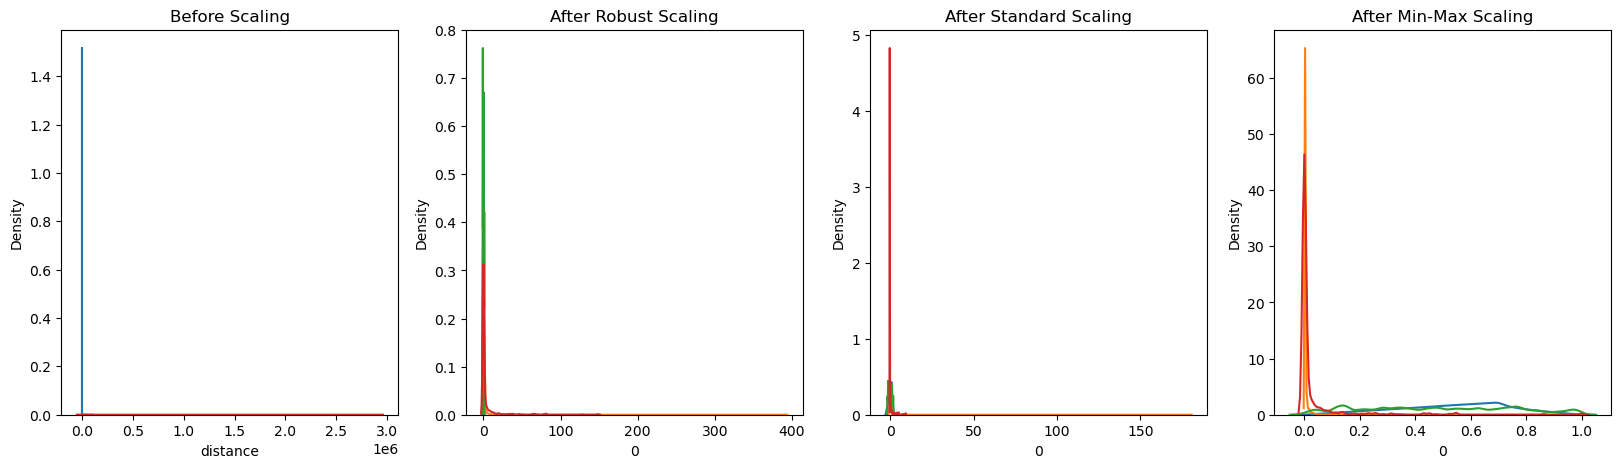

In [15]:
# Apply scaling
scaler = RobustScaler()
robust_df = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
robust_df = pd.DataFrame(robust_df)

scaler = StandardScaler()
standard_df = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
standard_df = pd.DataFrame(standard_df)

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
minmax_df = pd.DataFrame(minmax_df)

# Plotting the distributions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['distance'], ax=ax1)
sns.kdeplot(df['amt'], ax=ax1)
sns.kdeplot(df['zip'], ax=ax1)
sns.kdeplot(df['city_pop'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df[0], ax=ax2)
sns.kdeplot(robust_df[1], ax=ax2)
sns.kdeplot(robust_df[2], ax=ax2)
sns.kdeplot(robust_df[3], ax=ax2)

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df[0], ax=ax3)
sns.kdeplot(standard_df[1], ax=ax3)
sns.kdeplot(standard_df[2], ax=ax3)
sns.kdeplot(standard_df[3], ax=ax3)

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df[0], ax=ax4)
sns.kdeplot(minmax_df[1], ax=ax4)
sns.kdeplot(minmax_df[2], ax=ax4)
sns.kdeplot(minmax_df[3], ax=ax4)

plt.show()

In this case, RobustScaler was chosen because it is less sensitive to outliers than other scaling methods. Outliers are common in fraud detection datasets and can have a significant impact on the scaling process. RobustScaler scales the features using robust statistics such as median and interquartile range, making it more resistant to outliers. We ensure that the scaling is not skewed by extreme values by using RobustScaler, resulting in more reliable and consistent results. This is especially important in supervised learning models such as logistic regression and random forest because it helps capture meaningful patterns while reducing the impact of outliers.


In [16]:
# Apply scaling
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
df[['distance', 'amt', 'zip', 'city_pop']] = scaled_features

The code divides the dataset into separate training and testing sets after performing a train-test split on the features (X). This division is critical for evaluating the performance of the supervised learning models. 70% of the dataset is used for training (X_train, y_train) and 30% for testing (X_test, y_test). The goal is to train the models on the training data and then evaluate their performance on the unknown testing data, allowing us to assess their ability to generalise to new data.


In [17]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

To avoid biases in prediction, data must be balanced. There are 1,042,569 instances labelled as 0 (indicating non-fraudulent transactions) and 6,006 instances labelled as 1 (indicating fraudulent transactions) in this data. This indicates that the dataset is skewed, with a significantly higher proportion of non-fraudulent transactions than fraudulent ones. Imbalanced datasets can make training machine learning models difficult because they can lead to biassed predictions. To ensure fair and accurate predictions for both classes, it is critical to handle the class imbalance issue appropriately during model training.


In [18]:
df["is_fraud"].value_counts()

0    1042569
1       6006
Name: is_fraud, dtype: int64

Synthetic Minority Over-sampling Technique (SMOTE) and Random Under-sampling are the two methods used to deal with the imbalanced data.  SMOTE is an oversampling technique used to balance a dataset by creating synthetic samples of the minority class (fraudulent transactions). It creates new synthetic instances by interpolating between existing instances of the minority class. This helps to increase minority representation and address the issue of class imbalance. Random under-sampling, on the other hand, reduces the majority class (non-fraudulent transactions) by selecting a subset of instances at random from it. This contributes to the dataset's balance by matching the number of instances in the majority and minority classes.


Both methods aim to address the issue of class imbalance by improving the model's ability to learn from the minority class. The decision between SMOTE and Random Under-sampling is influenced by the dataset's characteristics and the problem at hand. 

SMOTE and Random Under-sampling are used in the analysis to compare their effectiveness in dealing with the imbalance. We can determine which method produces a more balanced dataset by visualising the class distribution before and after each method. This evaluation will aid in determining which method is best suited for improving the analysis's performance.


In [19]:
#!pip install imbalanced-learn

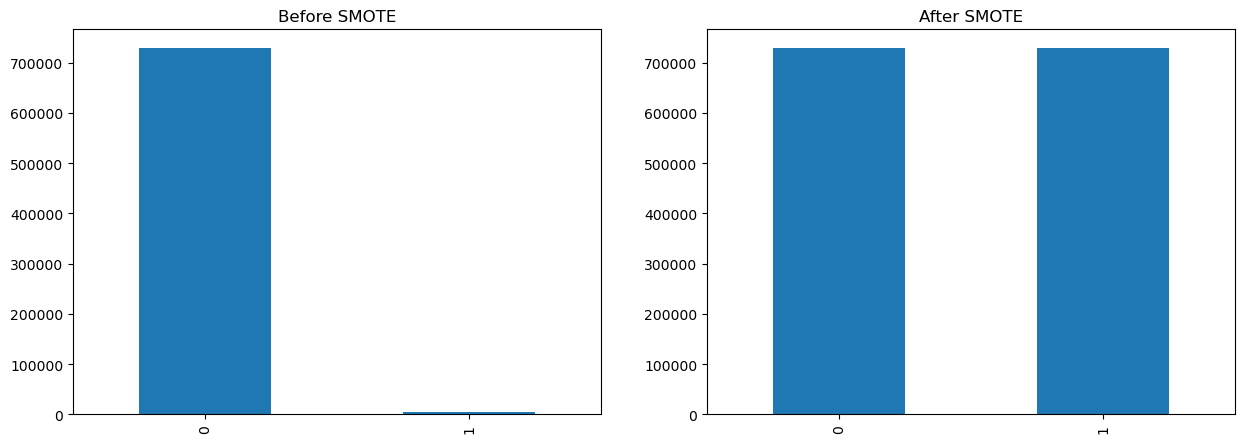

In [20]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

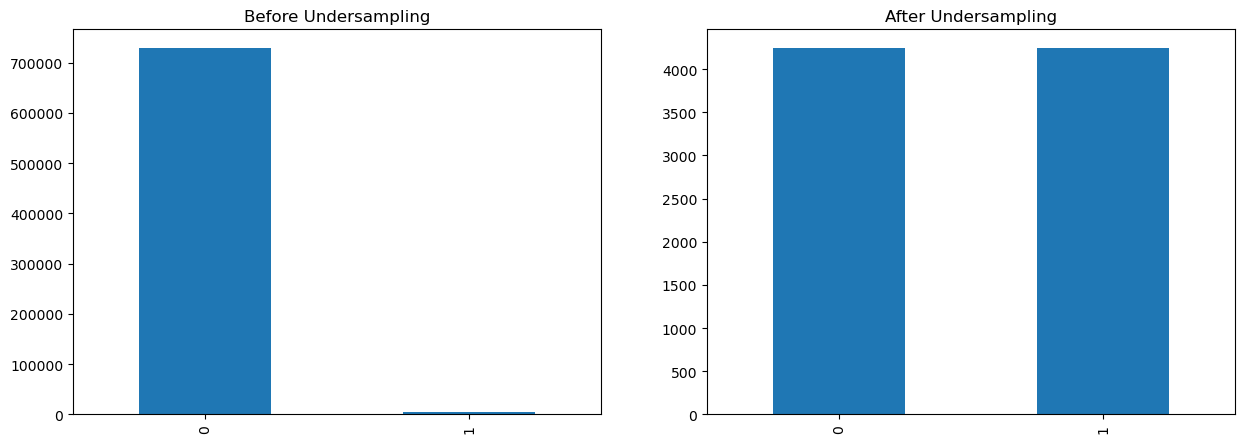

In [21]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# to demonstrate the effect of undersampling over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Undersampling')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After Undersampling')
pd.Series(y_train_resampled).value_counts().plot.bar(ax=ax2)

plt.show()

Using the SMOTE (Synthetic Minority Over-sampling Technique), a Random Forest classifier is trained on the oversampled data. SMOTE is used to address the dataset's class imbalance problem by generating synthetic samples of the minority class (fraudulent transactions) to balance the dataset.

Predictions are made on the test set (X_test) after the Random Forest classifier has been trained. The confusion matrix is then printed to assess the model's performance. The number of true negatives (311,823), false positives (992), false negatives (383), and true positives (1,375) are all displayed in the confusion matrix.

To further assess the model's performance, the evaluation metrics (accuracy, precision, recall, F1-score, and AUC-ROC) are computed. Accuracy quantifies the proportion of correctly predicted positive cases among all predicted positive cases, recall (also known as sensitivity) quantifies the proportion of actual positive cases correctly identified, F1-score combines precision and recall into a single metric, and AUC-ROC (Area Under the Receiver Operating Characteristic Curve) represents the trade-off between true positive rate and false positive rate.

The Random Forest classifier achieved an accuracy of 99.56%, precision of 58.09%, recall of 78.21%, F1-score of 66.67%, and AUC-ROC of 88.95% in the provided results. These metrics show that the model detects fraudulent transactions reasonably well, with a high overall accuracy but some room for improvement in precision and F1-score. The AUC-ROC value indicates a good balance of true and false positive rates.


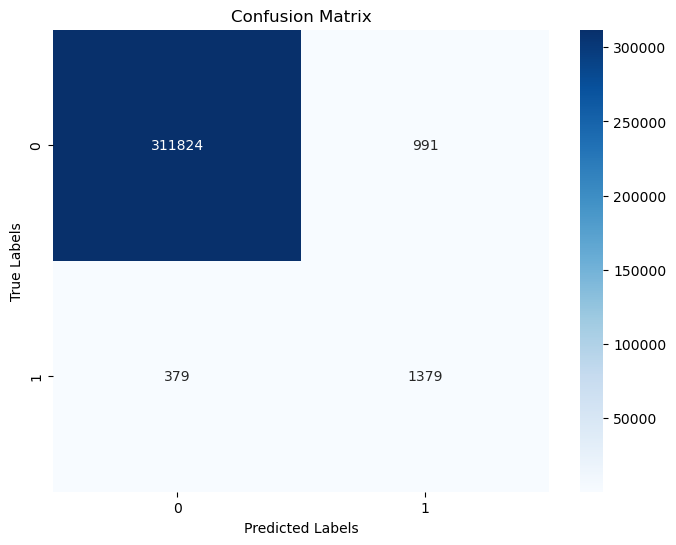


Accuracy: 0.9956448900573158
Precision: 0.5818565400843881
Recall: 0.7844141069397043
F1-score: 0.6681201550387597
AUC-ROC: 0.8906230501452033


In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Perform SMOTE oversampling and train the Random Forest classifier
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print()

# Compute evaluation metrics for SMOTE approach
smote_accuracy = accuracy_score(y_test, y_pred)
smote_precision = precision_score(y_test, y_pred)
smote_recall = recall_score(y_test, y_pred)
smote_f1 = f1_score(y_test, y_pred)
smote_auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", smote_accuracy)
print("Precision:", smote_precision)
print("Recall:", smote_recall)
print("F1-score:", smote_f1)
print("AUC-ROC:", smote_auc_roc)


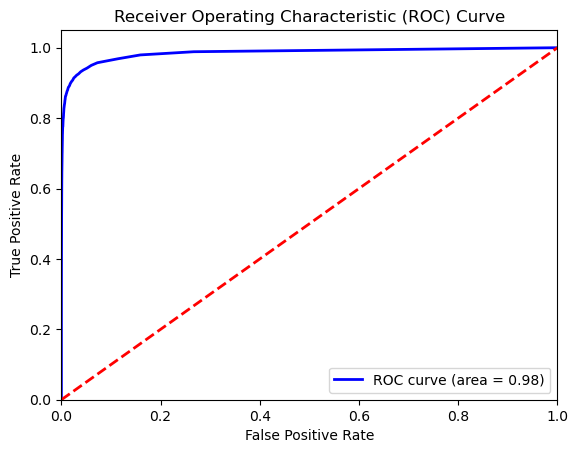

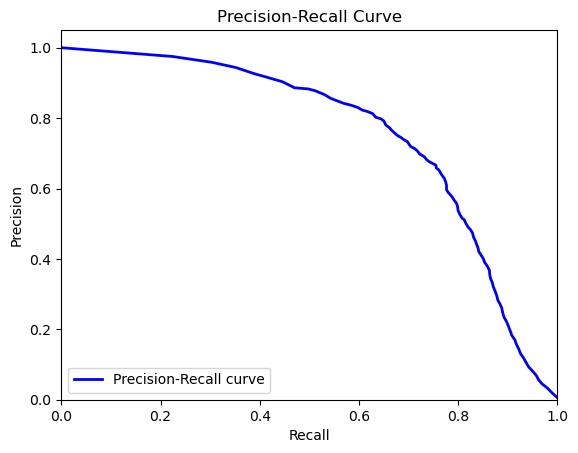

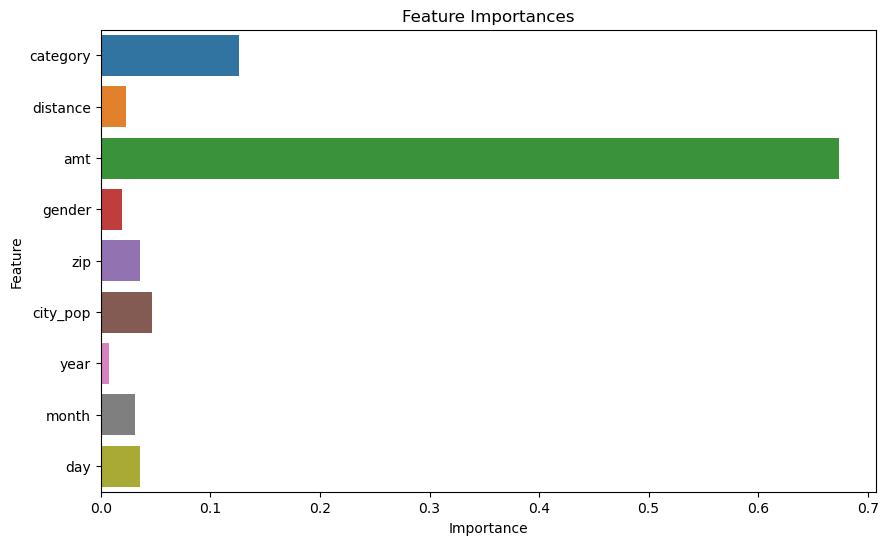

In [23]:
# Compute predicted probabilities for the test set
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under the ROC curve (roc_auc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute precision, recall, and thresholds for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Compute feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The code exports the first decision tree from the SMOTE-trained Random Forest classifier. The exported decision tree depicts the structure of the tree and aids in understanding its decision-making process. For easy sharing and reference, the tree is saved as a PDF file. This analysis aids in interpreting feature importance and comprehending the Random Forest model with SMOTE's underlying logic.



In [ ]:
#!pip install pydot

In [ ]:
# Get the first decision tree from the Random Forest
tree = rf_classifier.estimators_[0]

# Export the decision tree as a dot file
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=["Class 0", "Class 1"],  
                           filled=True, rounded=True) 

# Create a graph from the dot file
graph = pydot.graph_from_dot_data(dot_data)[0]

# Save the graph as a PDF
graph.write_pdf("decision_tree.pdf")

Using the undersampling approach, a Random Forest classifier is instantiated and trained on the resampled data. To create a balanced dataset, undersampling reduces the majority class (non-fraudulent transactions).

The Random Forest classifier is trained on resampled data before making predictions on the test set (X_test). The confusion matrix is then printed to assess the performance of the model. The number of true negatives (311,823), false positives (992), false negatives (383), and true positives (1,375) are all displayed in the confusion matrix.

The Random Forest classifier trained on undersampled data achieved an accuracy of 96.37%, F1 score of 0.22, precision of 0.13, recall of 0.94, and ROC AUC of 0.95 in the provided results. These metrics show that the model detects fraudulent transactions reasonably well, with a high recall (ability to identify the majority of actual fraud cases) but a low precision (potentially high false positive rate). The F1 score is low, indicating a compromise between precision and recall.


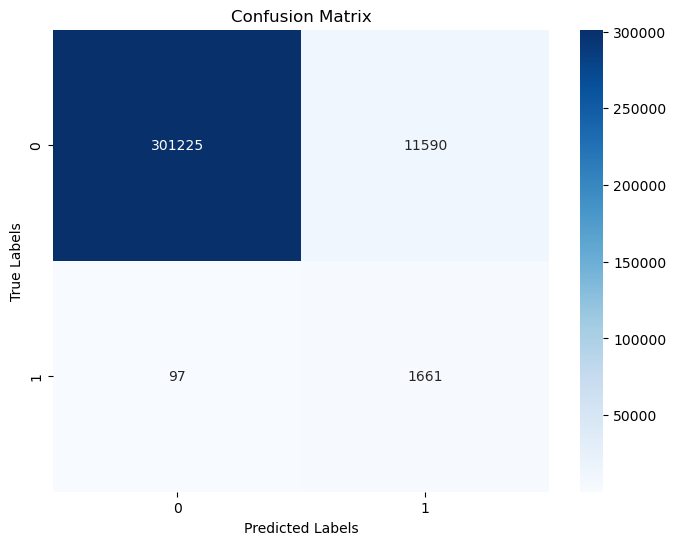


Accuracy: 0.9628480511677735
F1 Score: 0.22133386634685853
Precision: 0.12534903026186703
Recall: 0.9448236632536974
ROC AUC: 0.9538865051559313


In [24]:
# Create an instance of the random forest classifier
rf_model = RandomForestClassifier()

# Fit the model on the resampled data (undersampling)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print()

# Compute evaluation metrics for resampled approach
resampled_accuracy = accuracy_score(y_test, y_pred_resampled)
resampled_precision = precision_score(y_test, y_pred_resampled)
resampled_recall = recall_score(y_test, y_pred_resampled)
resampled_f1 = f1_score(y_test, y_pred_resampled)
resampled_auc_roc = roc_auc_score(y_test, y_pred_resampled)

print("Accuracy:", resampled_accuracy)
print("F1 Score:", resampled_f1)
print("Precision:", resampled_precision)
print("Recall:", resampled_recall)
print("ROC AUC:", resampled_auc_roc)


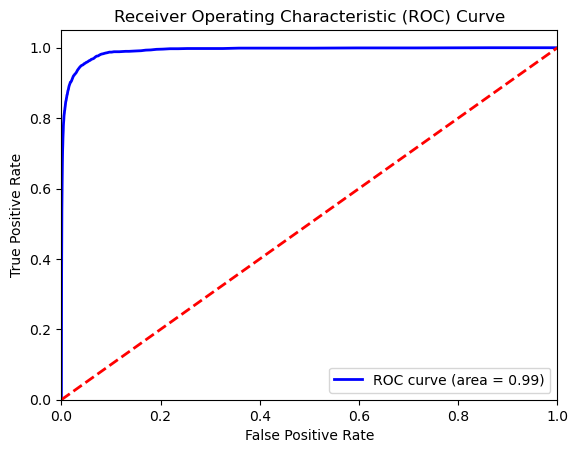

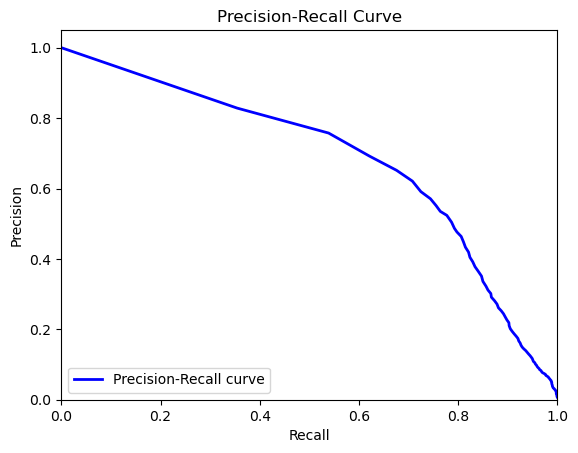

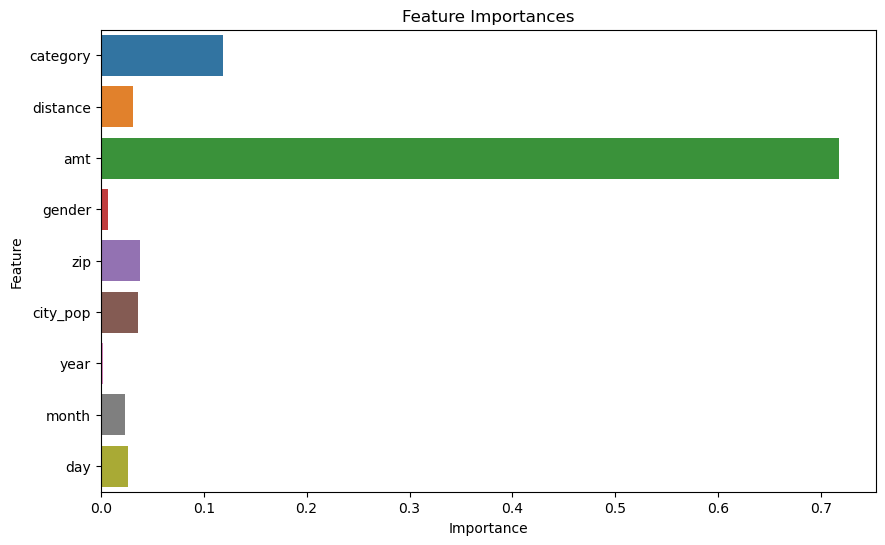

In [25]:
# Compute predicted probabilities for the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under the ROC curve (roc_auc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute precision, recall, and thresholds for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Compute feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The code exports the first decision tree from the undersampling-trained Random Forest classifier. The exported decision tree depicts the structure of the tree and aids in understanding its decision-making process. For easy sharing and reference, the tree is saved as a PDF file. This analysis aids in interpreting feature importance and comprehending the Random Forest model with undersampling's underlying logic.


In [ ]:
# Get the first decision tree from the Random Forest
tree = rf_model.estimators_[0]

# Export the decision tree as a dot file
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X_train.columns,
                           class_names=["Class 0", "Class 1"],
                           filled=True, rounded=True)

# Create a graph from the dot file
graph = pydot.graph_from_dot_data(dot_data)[0]

# Save the graph as a PDF
graph.write_pdf("decision_tree2.pdf")

The average of all metrics for each approach is calculated to assess and compare the performance of the SMOTE and undersampling approaches using Random Forest. The average is calculated to provide a summary measure that takes multiple metrics into account at the same time and allows for a more comprehensive comparison.

Depending on the specific goals and requirements of the task, different evaluation metrics may have varying levels of importance in fraud detection. The F1-score, on the other hand, is a widely used metric in fraud detection. The F1-score is a balanced measure that takes precision and recall into account. It gives a single value that combines the model's ability to correctly identify positive cases (fraud) while minimising false positives.

Depending on the specific goals and requirements of the task, different evaluation metrics may have varying levels of importance in fraud detection. The F1-score, on the other hand, is a widely used metric in fraud detection. The F1-score is a balanced measure that takes precision and recall into account. It gives a single value that combines the model's ability to correctly identify positive cases (fraud) while minimising false positives.

The average F1-score for the SMOTE approach is 0.783, while it is 0.641 for the undersampling approach. Based on this, we can conclude that the SMOTE approach with the Random Forest classifier outperforms the F1-score. Moreover, SMOTE also has the higher average of 78.30% compared with undersampling approach.

However, before deciding which approach is best, other factors and the specific requirements of the fraud detection task must be considered. The best model is determined by the acceptable trade-off between precision and recall in the context of the application. Undersampling, for example, may be preferred if the goal is to minimise false positives (precision). The SMOTE approach, on the other hand, may be more appropriate if the priority is to capture as many fraud cases as possible (recall).

In [26]:
# Create a DataFrame to store the evaluation metrics
data = {
    'Approach': ['SMOTE', 'Undersampling'],
    'Accuracy': [smote_accuracy, resampled_accuracy],
    'Precision': [smote_precision, resampled_precision],
    'Recall': [smote_recall, resampled_recall],
    'F1-score': [smote_f1, resampled_f1],
    'AUC-ROC': [smote_auc_roc, resampled_auc_roc]
}

df_rf = pd.DataFrame(data)

# Calculate the average of all metrics for each approach
df_rf['Average'] = df_rf.drop('Approach', axis=1).mean(axis=1)

df_rf

,Approach,Accuracy,Precision,Recall,F1-score,AUC-ROC,Average
0,SMOTE,0.995645,0.581857,0.784414,0.668120,0.890623,0.784132
1,Undersampling,0.962848,0.125349,0.944824,0.221334,0.953887,0.641648


# LOGISTIC

C:\Users\syein\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


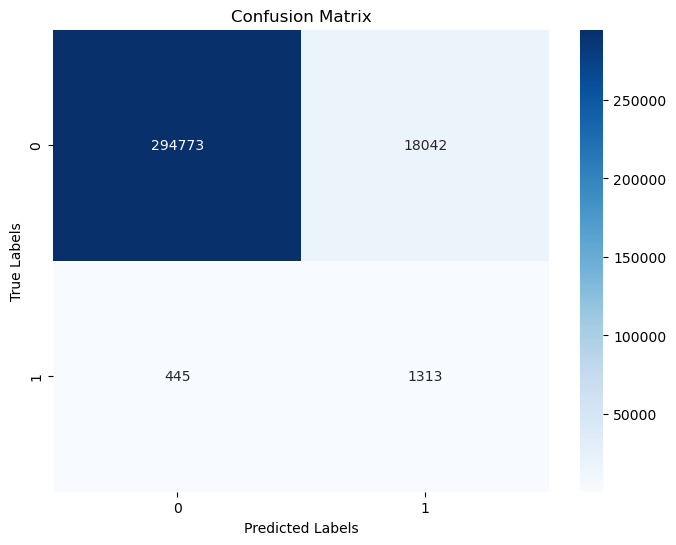


Accuracy: 0.9412314470726986
Precision: 0.06783776801859985
Recall: 0.7468714448236633
F1-score: 0.12437834509543884
AUC-ROC: 0.8445975912480447


In [27]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print()

# Compute evaluation metrics for SMOTE approach
smote_accuracy = accuracy_score(y_test, y_pred)
smote_precision = precision_score(y_test, y_pred)
smote_recall = recall_score(y_test, y_pred)
smote_f1 = f1_score(y_test, y_pred)
smote_auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", smote_accuracy)
print("Precision:", smote_precision)
print("Recall:", smote_recall)
print("F1-score:", smote_f1)
print("AUC-ROC:", smote_auc_roc)


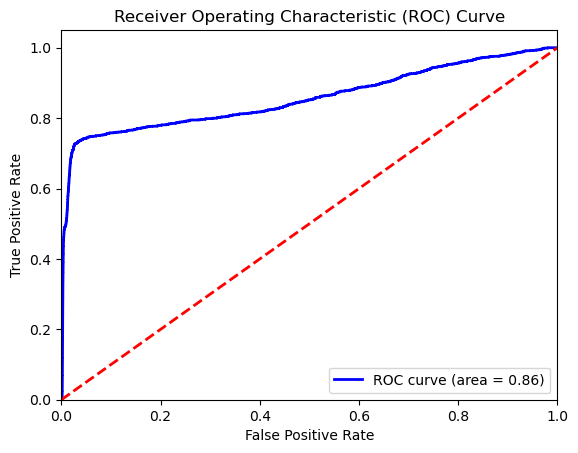

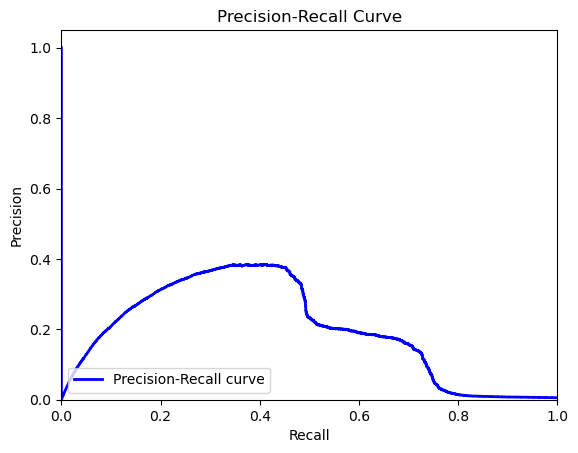

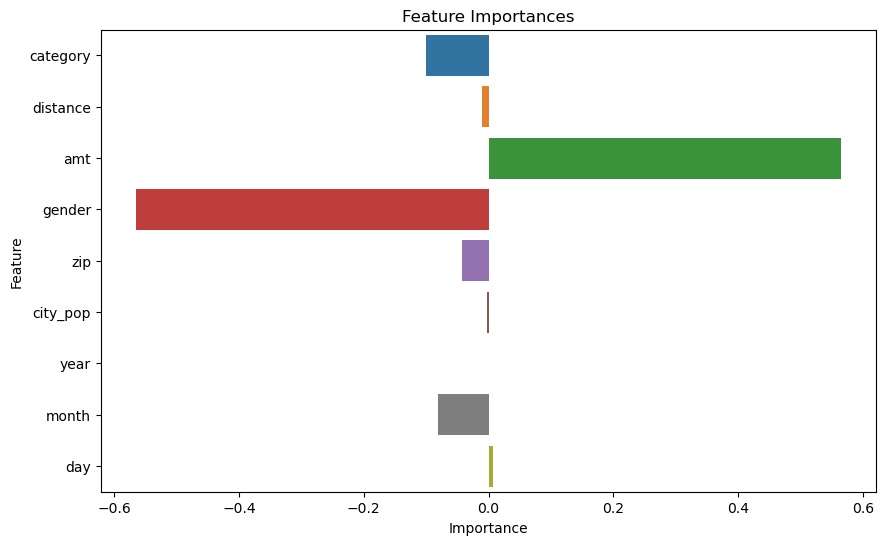

In [28]:
# Compute predicted probabilities for the test set
y_pred_prob = logreg_classifier.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under the ROC curve (roc_auc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute precision, recall, and thresholds for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Compute feature importances
importances = logreg_classifier.coef_[0]
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

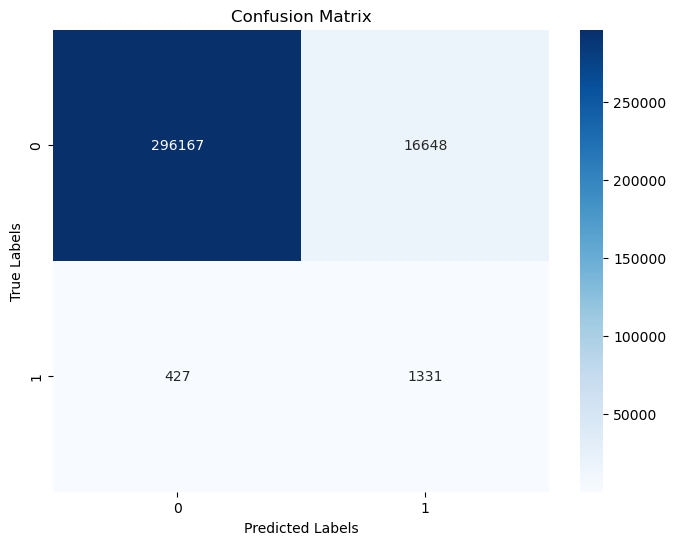


Accuracy: 0.9457200713347935
F1 Score: 0.13487358767796526
Precision: 0.0740308137271261
Recall: 0.7571103526734926
ROC AUC: 0.8519451991937065


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the logistic regression classifier
logreg_model = LogisticRegression()

# Fit the model on the resampled data (undersampling)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = logreg_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print()

# Compute evaluation metrics for resampled approach
resampled_accuracy = accuracy_score(y_test, y_pred_resampled)
resampled_precision = precision_score(y_test, y_pred_resampled)
resampled_recall = recall_score(y_test, y_pred_resampled)
resampled_f1 = f1_score(y_test, y_pred_resampled)
resampled_auc_roc = roc_auc_score(y_test, y_pred_resampled)

print("Accuracy:", resampled_accuracy)
print("F1 Score:", resampled_f1)
print("Precision:", resampled_precision)
print("Recall:", resampled_recall)
print("ROC AUC:", resampled_auc_roc)


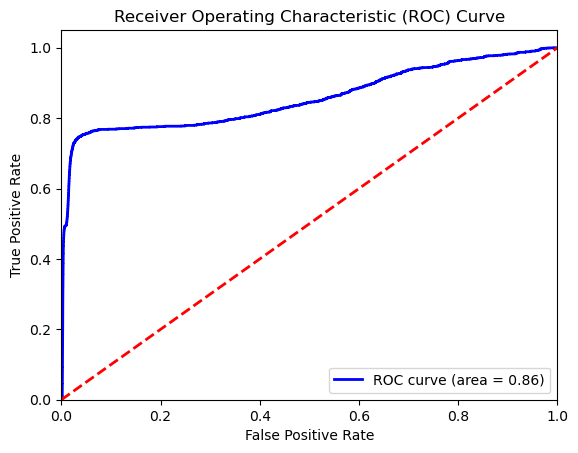

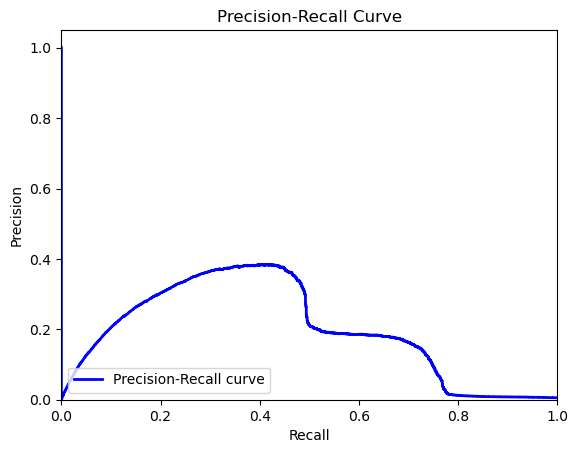

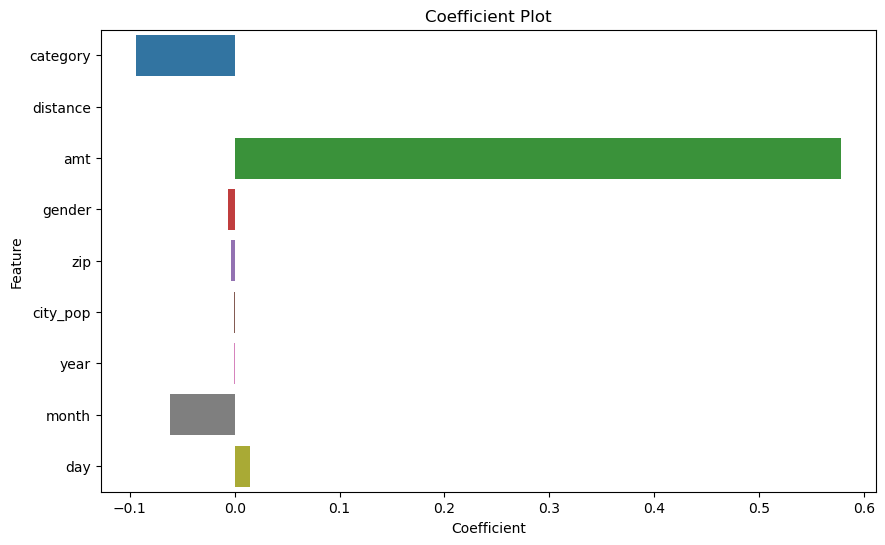

In [30]:
# Compute predicted probabilities for the test set
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under the ROC curve (roc_auc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute precision, recall, and thresholds for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Compute feature importances
coefficients = logreg_model.coef_[0]
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficient Plot')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [31]:
# Create a DataFrame to store the evaluation metrics
data2 = {
    'Approach': ['SMOTE', 'Undersampling'],
    'Accuracy': [smote_accuracy, resampled_accuracy],
    'Precision': [smote_precision, resampled_precision],
    'Recall': [smote_recall, resampled_recall],
    'F1-score': [smote_f1, resampled_f1],
    'AUC-ROC': [smote_auc_roc, resampled_auc_roc]
}

df_lr = pd.DataFrame(data2)

# Calculate the average of all metrics for each approach
df_lr['Average'] = df_lr.drop('Approach', axis=1).mean(axis=1)

df_lr

,Approach,Accuracy,Precision,Recall,F1-score,AUC-ROC,Average
0,SMOTE,0.941231,0.067838,0.746871,0.124378,0.844598,0.544983
1,Undersampling,0.945720,0.074031,0.757110,0.134874,0.851945,0.552736


In [55]:
# Merge the DataFrames horizontally
df_combined = pd.concat([df_rf, df_lr.drop('Approach', axis=1)], keys=['Random Forest', 'Logistic Regression'], axis=1)

df_combined


Random Forest                                                              \
        Approach  Accuracy Precision    Recall  F1-score   AUC-ROC   Average   
0          SMOTE  0.995645  0.581857  0.784414  0.668120  0.890623  0.784132   
1  Undersampling  0.962848  0.125349  0.944824  0.221334  0.953887  0.641648   

  Logistic Regression                                                    
             Accuracy Precision    Recall  F1-score   AUC-ROC   Average  
0            0.941231  0.067838  0.746871  0.124378  0.844598  0.544983  
1            0.945720  0.074031  0.757110  0.134874  0.851945  0.552736